# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

In [ ]:
!pip install sklearn
#palmerpenguins==0.1.4 empiricaldist==0.6.7 statsmodels==0.13.5 pyjanitor==0.23.1 session-info

## Importar librerías

In [44]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
#import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [45]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [ ]:
war_penguins_df = palmerpenguins.load_penguins_raw()
war_penguins_df

#### Datos previamente procesados

In [48]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de `seaborn`

In [13]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

### Lectura de archivo csv

In [ ]:
preprocess_penguins_df = pd.read_csv("penguins_raw.csv")
preprocess_penguins_df

# Colecta y validación de datos

## ¿De qué tipo de dato, son las variables del conjunto de datos?

In [49]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [50]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones(filas) tenemos en el conjunto de datos?

In [51]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [52]:
preprocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [53]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    )

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [54]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
    )

19

## ¿Cuál es la proporción de valores nulos por cada variable?

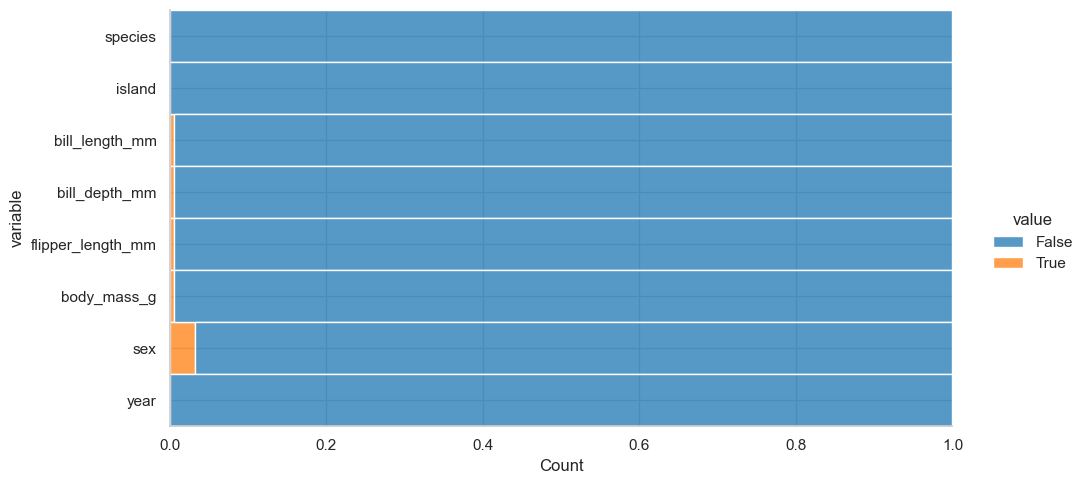

In [55]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda l: (
            sns.displot(
                data=l, y="variable", hue="value", multiple="fill", aspect=2
            )
        )
    )
    )

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

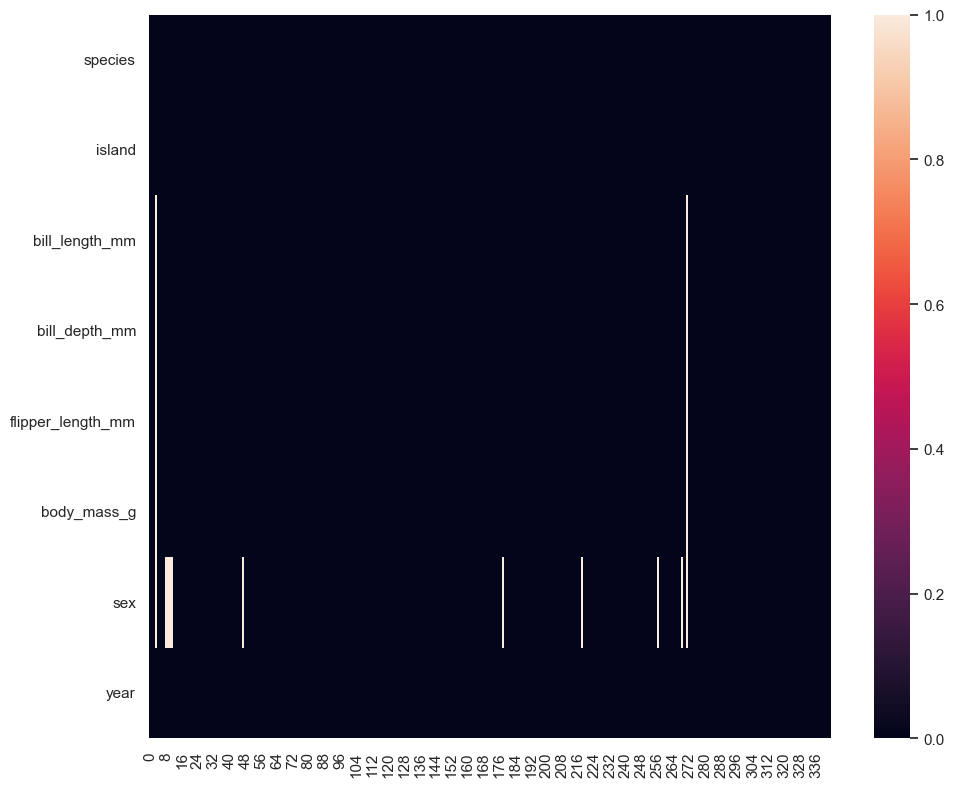

In [56]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [57]:
preprocess_penguins_df.shape

(344, 8)

In [58]:
processed_penguins_df = preprocess_penguins_df.dropna()

In [59]:
processed_penguins_df.shape

(333, 8)

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [60]:
preprocess_penguins_df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


### Solo las numéricas

In [61]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [62]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [64]:
(
    processed_penguins_df
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
    .describe(include="category")
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

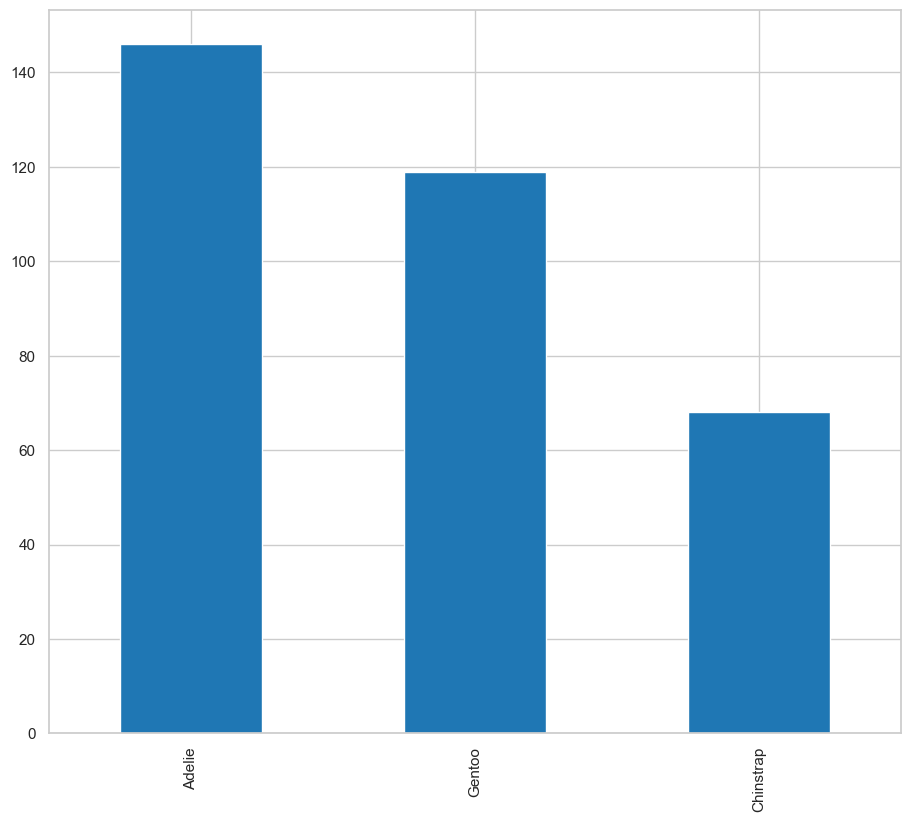

In [65]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind="bar"
    )
)

### Seaborn

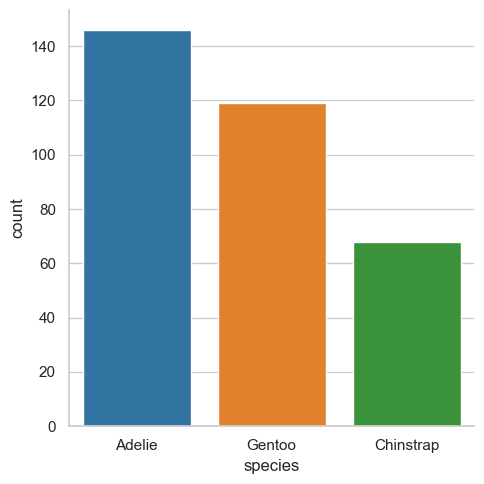

In [66]:
sns.catplot(
    data=processed_penguins_df,
    x="species",
    kind="count",
)

<AxesSubplot: xlabel='species', ylabel='count'>

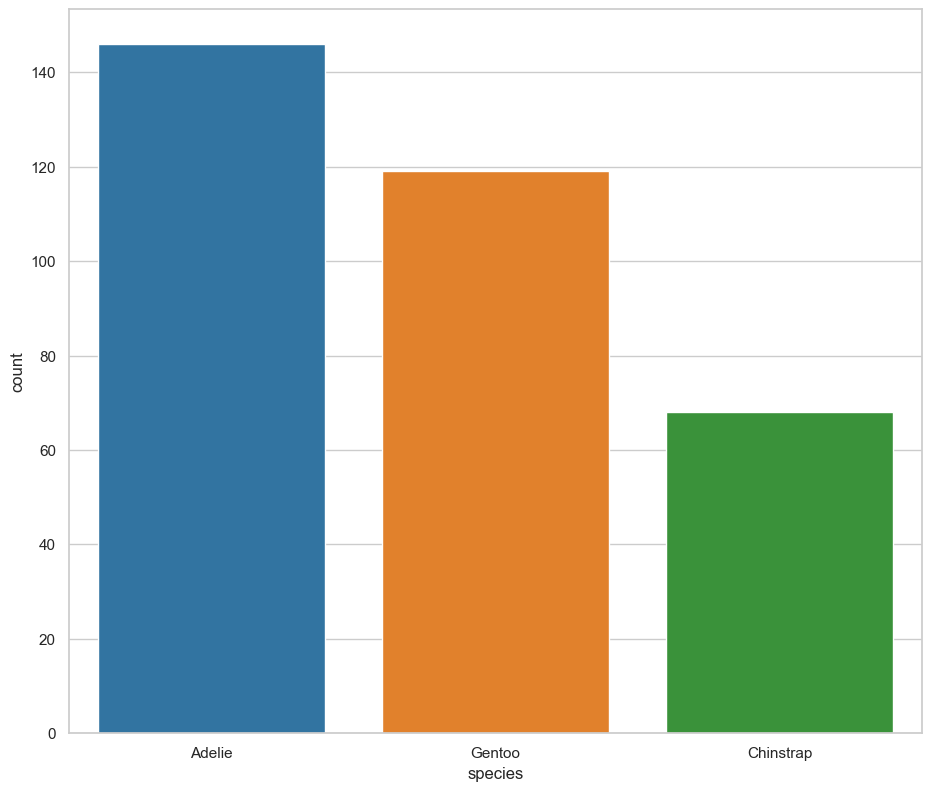

In [68]:
(
    processed_penguins_df
    .value_counts("species")
    .reset_index(name="count")
    .pipe(
        lambda l: (
            sns.barplot(
                data=l,
                x="species",
                y="count"
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

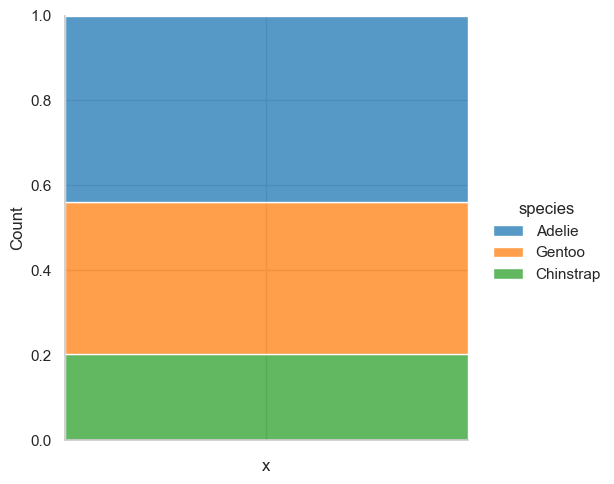

In [69]:
(
    processed_penguins_df
    .add_column("x", "")
    .pipe(
        lambda l: (
            sns.displot(
                data=l,
                x="x",
                hue="species",  #color por especie
                multiple="fill" #proporcion completa
            )
        )
    )
)

# Medidas de tendencia central

## Usando pandas para obtener media o promedio

In [70]:
processed_penguins_df.bill_depth_mm.mean() #altura promedio del pico

17.164864864864867

## Usando python para obtener el promedio

In [71]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [72]:
processed_penguins_df.mean()

C:\Users\jose1\AppData\Local\Temp\ipykernel_16828\1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana con pandas

In [73]:
processed_penguins_df.mean()

C:\Users\jose1\AppData\Local\Temp\ipykernel_16828\1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Moda con pandas

In [74]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


## Describiendo variables categoricas

In [75]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

## ¿Cuál es el valor mínimo de las variables?

## ¿Cuál es el rango de las variables?

## ¿Cuál es la desviación estándar de las variables?

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## ¿Cuál es el rango intercuartílico?

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

### Diagrama de caja / boxplot

### Limitaciones

In [ ]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

### Utilizando `empiricaldist`

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

### Utilizando `empiricaldist`

### Comparando distribuciones

## Funciones de densidad de probabilidad

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

## Teorema del Límite Central

# Estableciendo relaciones: Gráfica de puntos

# Estableciendo relaciones: Gráficos de violín y boxplots

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

## ¿Cómo puedo visualizar los coeficientes de correlación?

## ¿Cómo podría representar una variable categórica como númerica discreta?

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

# Estableciendo relaciones: Análisis de regresión simple

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

## Información de sesión

In [2]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb8b09fe-58e5-4e41-98af-4532009b73b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>